# Default Template

In [2]:
import os
import sys
import datetime
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import muon as mu
mu.set_options(pull_on_update=False)

import scanpy as sc

2025-09-08 15:03:08.322625: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-08 15:03:08.359871: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-08 15:03:13.910408: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
sys.path.insert(0, '/scratch/g/tgu/svenkatesan/Other/SCREAM_wf')
import SCREAM

In [4]:
mainDir = '/scratch/g/tgu/svenkatesan/Other/SCREAM_wf'
inputDir = os.path.join(mainDir, 'inputfiles')
rawDir = os.path.join(inputDir, 'raw')
processedDir = os.path.join(inputDir, 'processed')
resultsDir = os.path.join(mainDir, 'results')

In [5]:
print(f'Time before running script: {datetime.datetime.now().strftime("%d %b %Y %H:%M:%S")}')  # datetime object

Time before running script: 08 Sep 2025 15:03:16


## Main script

In [6]:
mdata = mu.read_h5mu(os.path.join(processedDir, 'scream_10xpbmc_atac.h5mu'))
display(mdata)

MuData object with n_obs × n_vars = 9966 × 3299
  obs:	'desc_0.05', 'desc_0.06', 'desc_0.08', 'desc_0.09', 'desc_0.1', 'desc_0.2', 'desc_0.3', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.7', 'desc_0.8', 'desc_0.9', 'desc_1.0', 'leiden', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'desc_1.25', 'desc_1.5', 'desc_1.75', 'desc_2.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'leiden_2.0'
  uns:	'desc_0.2_colors', 'desc_0.9_colors', 'desc_1.0_colors', 'desc_1.75_colors', 'leiden', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.1_colors', 'neighbors', 'prob_matrix0.05', 'prob_matrix0.06', 'prob_matrix0.08', 'prob_matrix0.09', 'prob_matrix0.1', 'prob_matrix0.2', 'prob_matrix0.3', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.7', 'prob_matrix0.8', 'prob_matrix0.9', 'prob_matrix1.0', 'prob_matrix1.25', 'prob_matrix1.5', 'prob_matrix1.75', 'prob_matrix2.0', 'tsne', 'umap'
  obsm:	'X_Embedded_z0.05', 'X_Embedded_z0.06', 'X_Embedded_z0.08', 'X_Embedded_z0.09', 'X_Embedded_z0.1', 'X_Embedded_z0.2', 'X_Embedded_z0.3', 'X_Embedded_z0.4', 'X_Embedded_z0.5', 'X_Embedded_z0.6', 'X_Embedded_z0.7', 'X_Embedded_z0.8', 'X_Embedded_z0.9', 'X_Embedded_z1.0', 'X_Embedded_z1.25', 'X_Embedded_z1.5', 'X_Embedded_z1.75', 'X_Embedded_z2.0', 'X_tsne', 'X_tsne0.05', 'X_tsne0.06', 'X_tsne0.08', 'X_tsne0.09', 'X_tsne0.1', 'X_tsne0.2', 'X_tsne0.3', 'X_tsne0.4', 'X_tsne0.5', 'X_tsne0.6', 'X_tsne0.7', 'X_tsne0.8', 'X_tsne0.9', 'X_tsne1.0', 'X_tsne1.25', 'X_tsne1.5', 'X_tsne1.75', 'X_tsne2.0', 'X_umap', 'X_umap0.05', 'X_umap0.06', 'X_umap0.08', 'X_umap0.09', 'X_umap0.1', 'X_umap0.2', 'X_umap0.3', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.7', 'X_umap0.8', 'X_umap0.9', 'X_umap1.0', 'X_umap1.25', 'X_umap1.5', 'X_umap1.75', 'X_umap2.0', 'joint_ls'
  obsp:	'connectivities', 'distances'
  2 modalities
    rna:	9966 x 3000
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'predicted.id', 'prediction.score.CD14.Mono', 'prediction.score.CD4.TCM', 'prediction.score.CD8.Naive', 'prediction.score.NK', 'prediction.score.CD8.TEM', 'prediction.score.CD16.Mono', 'prediction.score.B.intermediate', 'prediction.score.CD4.Naive', 'prediction.score.CD4.CTL', 'prediction.score.B.naive', 'prediction.score.MAIT', 'prediction.score.gdT', 'prediction.score.CD8.TCM', 'prediction.score.dnT', 'prediction.score.B.memory', 'prediction.score.Doublet', 'prediction.score.pDC', 'prediction.score.CD8.Proliferating', 'prediction.score.Treg', 'prediction.score.Plasmablast', 'prediction.score.CD4.TEM', 'prediction.score.cDC2', 'prediction.score.NK.Proliferating', 'prediction.score.ASDC', 'prediction.score.HSPC', 'prediction.score.Platelet', 'prediction.score.NK_CD56bright', 'prediction.score.CD4.Proliferating', 'prediction.score.Eryth', 'prediction.score.cDC1', 'prediction.score.ILC', 'prediction.score.max', 'SCT.weight', 'ATAC.weight', 'cell_types_anno', 'leiden', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'desc_leiden_0.1', 'desc_leiden_0.2', 'desc_leiden_0.3', 'desc_leiden_0.4', 'desc_leiden_0.5', 'desc_leiden_0.6', 'desc_leiden_0.7', 'desc_leiden_0.8', 'desc_leiden_0.9', 'desc_leiden_1.0'
      var:	'modality'
      uns:	'cell_types_anno_colors', 'desc_leiden_0.4_colors', 'desc_leiden_0.7_colors', 'desc_leiden_0.9_colors', 'desc_leiden_1.0_colors', 'desc_ls_hparams', 'leiden', 'leiden_0.1_colors', 'neighbors', 'predicted.id_colors', 'umap', 'varfeats'
      obsm:	'X_desc_ls', 'X_umap', 'pca'
      layers:	'raw', 'sct'
      obsp:	'connectivities', 'distances'
    atac:	9966 x 299
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', '

In [28]:
leiden_res = sorted(set(list(np.linspace(0.1, 1, num=10).round(decimals=2))).
                    union(set(list(np.linspace(0.05, 0.1, num=5).round(decimals=2)))).
                    union(set(list(np.linspace(1, 2, num=5).round(decimals=2)))))

{}


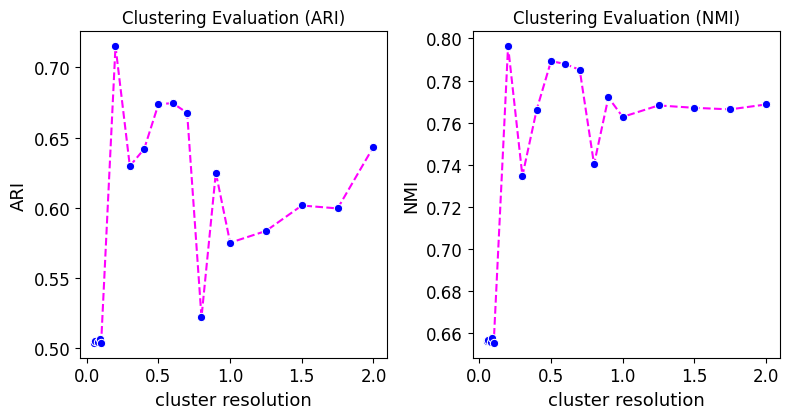

In [30]:
ari_pd = SCREAM.models.tools.calc_ari(mdata, label_col='rna:cell_types_anno', cluster_res=leiden_res)
nmi_pd = SCREAM.models.tools.calc_nmi(mdata, label_col='rna:cell_types_anno', cluster_res=leiden_res)

metrics_df = ari_pd.join([nmi_pd])
fig = SCREAM.models.tools.plot_clustereval(metrics_df, res_col='cluster resolution', met_cols=None, ncols=5, figsize=None)

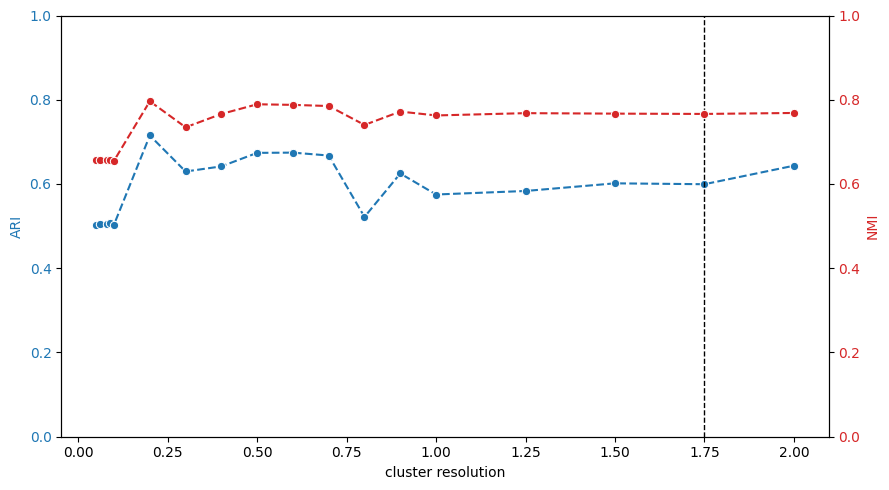

In [95]:
fig, ax1 = plt.subplots(1, 1, figsize=(9, 5), layout='tight')
ax2 = ax1.twinx()

default_plot_opts = {'marker': 'o', 'linestyle': '--'}

# plot first metric
sns.lineplot(data=metrics_df, x='cluster resolution', y='ARI', ax=ax1, color='tab:blue', **default_plot_opts)
ax1.set_ylabel('ARI', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, 1)
# plot second metric
sns.lineplot(data=metrics_df, x='cluster resolution', y='NMI', ax=ax2, color='tab:red', **default_plot_opts)
ax2.set_ylabel('NMI', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1)
ax1.set_xlabel('cluster resolution')

# ax1.axvline(x=0.2, color='k', linestyle='--', linewidth=1)
ax1.axvline(x=1.75, color='k', linestyle='--', linewidth=1)
# fig.tight_layout()
# return fig

fig.savefig(os.path.join(processedDir, '10xpbmc_metrics_plot.png'), dpi=300, bbox_inches='tight')

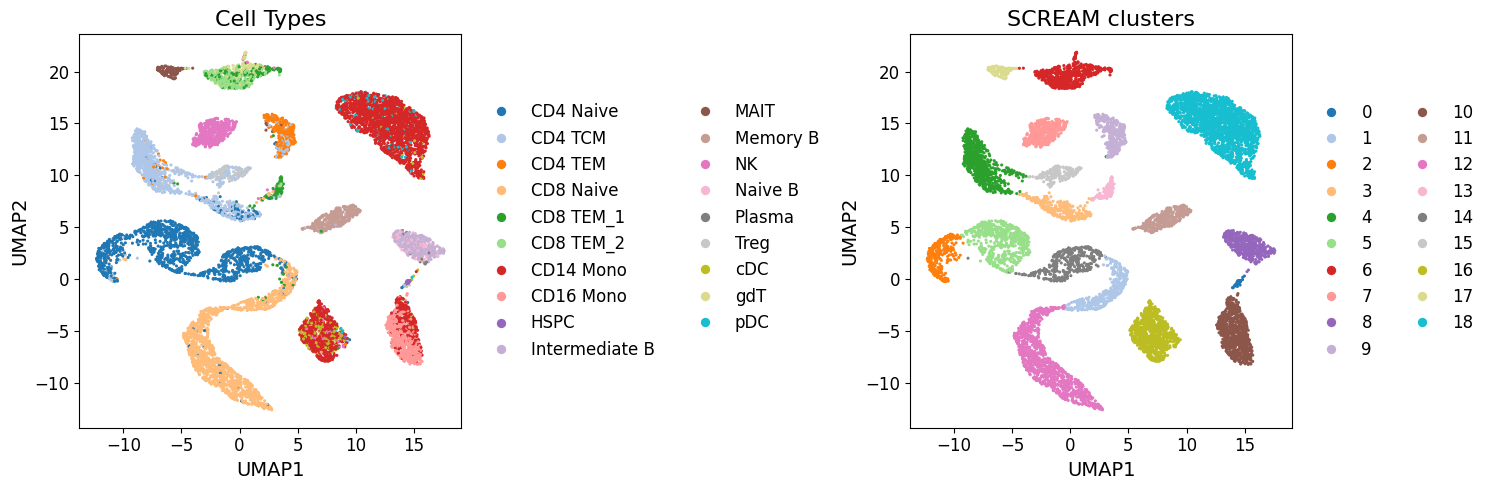

In [105]:
plot_df = pd.DataFrame(mdata.obsm['X_umap1.75'], columns=['UMAP1', 'UMAP2'], index=mdata.obs_names)
plot_df['cell_types_anno'] = mdata.mod['rna'].obs['cell_types_anno'].values
plot_df['desc_1.75'] = mdata.obs['desc_1.75'].values  # assuming this lives in .obs of mdata

# plot with seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5), layout='tight')
ax = ax.ravel()
sns.scatterplot(data=plot_df, x='UMAP1', y='UMAP2',
                hue='cell_types_anno', s=5, ax=ax[0], linewidth=0, palette='tab20')
ax[0].set_title('Cell Types', fontsize=16)
ax[0].set_xlabel('UMAP1', fontsize=14)
ax[0].set_ylabel('UMAP2', fontsize=14)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

sns.scatterplot(data=plot_df, x='UMAP1', y='UMAP2',
                hue='desc_1.75', s=5, ax=ax[1], linewidth=0, palette='tab20')
ax[1].set_title('SCREAM clusters', fontsize=16)
ax[1].set_xlabel('UMAP1', fontsize=14)
ax[1].set_ylabel('UMAP2', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

for a in ax:
    legend = a.get_legend()
    handles, labels = a.get_legend_handles_labels()
    a.legend(handles, labels,
             loc='center left',
             bbox_to_anchor=(1.02, 0.5),
             frameon=False,        # no box
             markerscale=3,        # bigger circles in legend
             fontsize=12,
             title=None, ncol=2)

fig.savefig(os.path.join(processedDir, '10xpbmc_umaps_plot.png'), dpi=300, bbox_inches='tight')

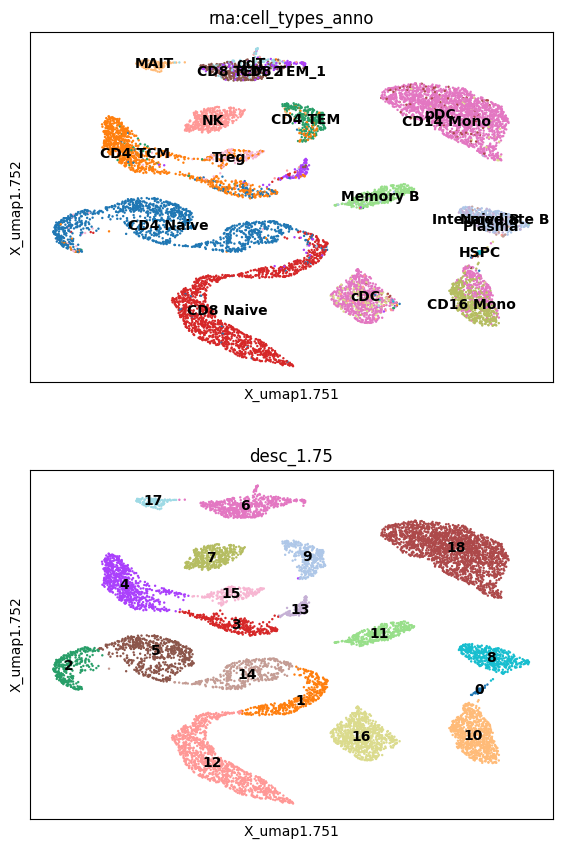

In [97]:
fig = mu.pl.embedding(mdata, color=['rna:cell_types_anno', 'desc_1.75'], basis='X_umap1.75', ncols=1, legend_loc='on data', show=False, return_fig=True)
fig.savefig(os.path.join(processedDir, '10xpbmc_umaps_plot2.png'), dpi=300, bbox_inches='tight')

In [98]:
moclust_ari = pd.read_csv(os.path.join(rawDir, 'Moclust_plots', 'ARI 10XPBMC.csv')).rename(columns={'y': 'ARI'})
moclust_nmi = pd.read_csv(os.path.join(rawDir, 'Moclust_plots', 'NMI 10XPBMC.csv')).rename(columns={'y': 'NMI'})
moclust_metrics = pd.concat([moclust_ari, moclust_nmi], axis=1)
moclust_metrics.index = ['cobolt', 'DCCA', 'Harmony', 'Liger', 'Moclust',
                         'MOFA+', 'MultiVI', 'scAI', 'scMVAE', 'Seurat', 'UnionCom']

In [102]:
full_metrics = pd.concat([metrics_df.loc[1.75, :].to_frame().T, moclust_metrics], axis=0).rename(index={1.75: 'SCREAM'})

In [106]:
full_metrics

,ARI,NMI
SCREAM,0.599463,0.766289
cobolt,0.348190,0.548060
DCCA,0.510880,0.495050
Harmony,0.145080,0.257600
Liger,0.201040,0.372080
Moclust,0.681870,0.671020
MOFA+,0.455960,0.502470
MultiVI,0.537820,0.491870
scAI,0.410360,0.455830
scMVAE,0.550260,0.558660


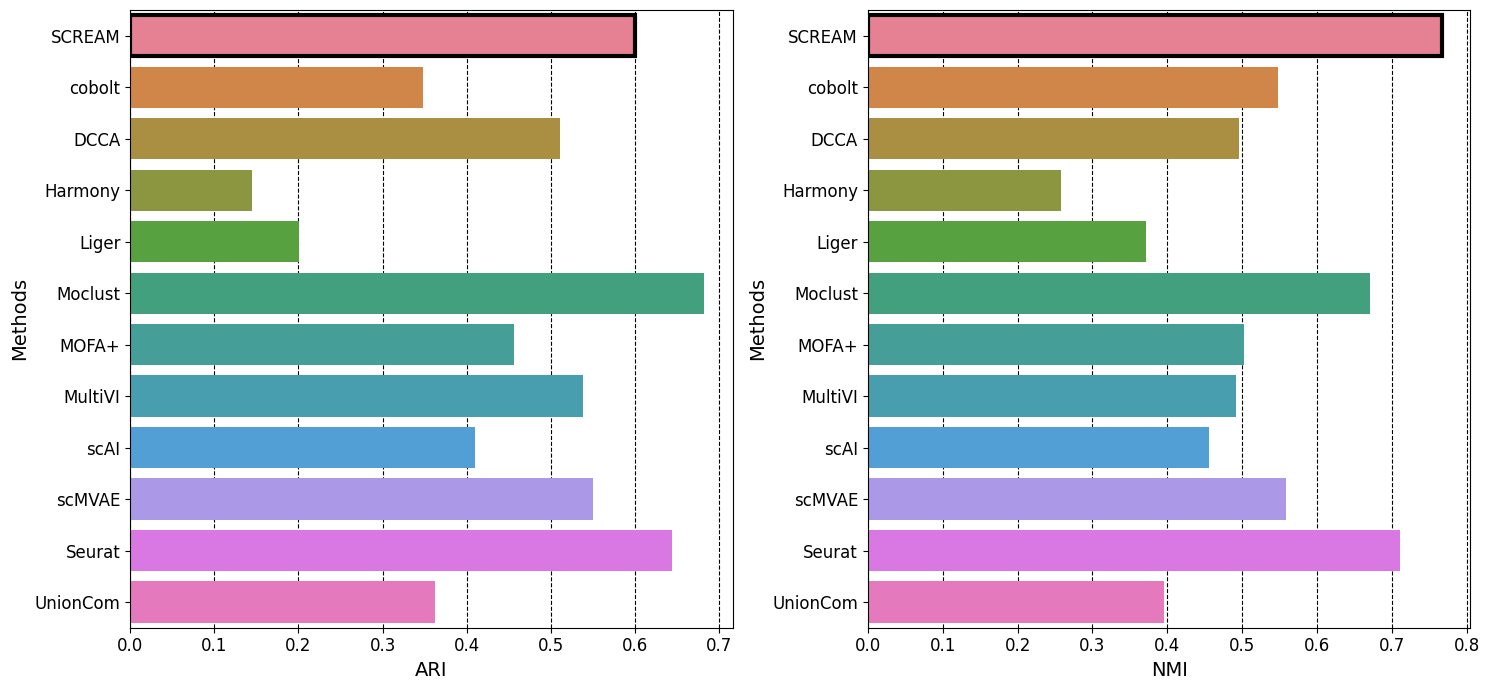

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), layout='tight')
ax = ax.ravel()
sns.barplot(full_metrics.reset_index(names='Methods'), y='Methods', x='ARI', ax=ax[0], hue='Methods', legend=False, zorder=2)
ax[0].set_xlabel('ARI', fontsize=14)
ax[0].set_ylabel('Methods', fontsize=14)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].xaxis.grid(True, which='major', linestyle='--', linewidth=0.8, color='black')

sns.barplot(full_metrics.reset_index(names='Methods'), y='Methods', x='NMI', ax=ax[1], hue='Methods', legend=False, zorder=2)
ax[1].set_xlabel('NMI', fontsize=14)
ax[1].set_ylabel('Methods', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].xaxis.grid(True, which='major', linestyle='--', linewidth=0.8, color='black')

bars0 = ax[0].patches
last_bar0 = bars0[0]
last_bar0.set_edgecolor('black')
last_bar0.set_linewidth(3)

# highlight last bar in NMI plot
bars1 = ax[1].patches
last_bar1 = bars1[0]
last_bar1.set_edgecolor('black')
last_bar1.set_linewidth(3)

fig.savefig(os.path.join(processedDir, '10xpbmc_comparisons_plot.png'), dpi=300, bbox_inches='tight')

## Script summary

In [ ]:
print(f'Time after running script: {datetime.datetime.now().strftime("%d %b %Y %H:%M:%S")}')  # datetime object

In [ ]:
import session_info
try:
    print(session_info.show(cpu=True, dependencies=True, html=False))
except Exception:
    print(session_info.show(cpu=True, dependencies=False, html=False))